**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
SEED = 23

**Load DATA**

In [ ]:
df = pd.read_csv("gnew.csv")
df

,DOI,MATERIAL 1,MATERIAL 2,MATERIAL 3,MATERIAL 4,Electrolyte Concentration,ELECTROLYTE,Electrode Configuration,Cell Configuration,Specific Surface Area(m2/g),Pore Size(mm),CURRENT DENSITY(A/g),Voltage Window,Cycle Number,Pore Volume(cm3/g),Scan Rate(mv/s),Capacitance(F/g)
0,10.1016/j.jpowsour.2011.06.038,Graphene nanosheets,SnO2,MWCNTs,NaN,20.0,KOH,two electrode configuration,supercapacitor test cell,350.0,0.000005,6.00,-0.05,6000.0,0.90,106.49,218.22
1,10.1016/j.jpowsour.2011.06.038,Graphene nanosheets,SnO2,MWCNTs,NaN,20.0,KOH,two electrode configuration,supercapacitor test cell,350.0,0.000005,6.00,-0.05,6000.0,0.90,119.74,216.77
2,10.1016/j.jpowsour.2011.06.038,Graphene nanosheets,SnO2,MWCNTs,NaN,20.0,KOH,two electrode configuration,supercapacitor test cell,350.0,0.000005,6.00,-0.05,6000.0,0.90,132.98,203.32
3,10.1016/j.jpowsour.2011.06.038,Graphene nanosheets,SnO2,MWCNTs,NaN,20.0,KOH,two electrode configuration,supercapacitor test cell,350.0,0.000005,6.00,-0.05,6000.0,0.90,146.22,184.98
4,10.1016/j.jpowsour.2011.06.038,Graphene nanosheets,SnO2,MWCNTs,NaN,20.0,KOH,two electrode configuration,supercapacitor test cell,350.0,0.000005,6.00,-0.05,6000.0,0.90,159.46,178.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,http://dx.doi.org/10.1016/j.carbon.2013.09.085,mesoporous graphene with a three-dimensional s...,graphite,graphite oxide,NaN,1.5,tetraethylammonium tetrafluoroborate (TEABF4) ...,three-electrode,button cell system,81.7,0.000005,1.59,1.20,300.0,0.11,124.00,143.39
508,http://dx.doi.org/10.1016/j.carbon.2013.09.085,mesoporous graphene with a three-dimensional s...,graphite,graphite oxide,NaN,1.5,tetraethylammonium tetrafluoroborate (TEABF4) ...,three-electrode,button cell system,81.7,0.000005,1.59,1.20,320.0,0.11,124.00,142.52
509,http://dx.doi.org/10.1016/j.carbon.2013.09.085,mesoporous graphene with a three-dimensional s...,graphite,graphite oxide,NaN,1.5,tetraethylammonium tetrafluoroborate (TEABF4) ...,three-electrode,button cell system,81.7,0.000005,1.59,1.20,340.0,0.11,124.00,141.60
510,http://dx.doi.org/10.1016/j.carbon.2013.09.085,mesoporous graphene with a three-dimensional s...,graphite,graphite oxide,NaN,1.5,tetraethylammonium tetrafluoroborate (TEABF4) ...,three-electrode,button cell system,81.7,0.000005,1.59,1.20,360.0,0.11,124.00,141.20


In [ ]:
print(df.columns)

Index(['DOI', 'MATERIAL 1', 'MATERIAL 2', 'MATERIAL 3', 'MATERIAL 4',
       'Electrolyte Concentration', 'ELECTROLYTE ', 'Electrode Configuration',
       'Cell Configuration', 'Specific Surface Area(m2/g)', 'Pore Size(mm)',
       'CURRENT DENSITY(A/g)', 'Voltage Window', 'Cycle Number',
       'Pore Volume(cm3/g)', 'Scan Rate(mv/s)', 'Capacitance(F/g)'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DOI                          512 non-null    object 
 1   MATERIAL 1                   512 non-null    object 
 2   MATERIAL 2                   512 non-null    object 
 3   MATERIAL 3                   33 non-null     object 
 4   MATERIAL 4                   0 non-null      float64
 5   Electrolyte Concentration    512 non-null    float64
 6   ELECTROLYTE                  512 non-null    object 
 7   Electrode Configuration      512 non-null    object 
 8   Cell Configuration           512 non-null    object 
 9   Specific Surface Area(m2/g)  512 non-null    float64
 10  Pore Size(mm)                512 non-null    float64
 11  CURRENT DENSITY(A/g)         512 non-null    float64
 12  Voltage Window               512 non-null    float64
 13  Cycle Number        

**Checking for Null Values**

In [ ]:
df.isnull()

,DOI,MATERIAL 1,MATERIAL 2,MATERIAL 3,MATERIAL 4,Electrolyte Concentration,ELECTROLYTE,Electrode Configuration,Cell Configuration,Specific Surface Area(m2/g),Pore Size(mm),CURRENT DENSITY(A/g),Voltage Window,Cycle Number,Pore Volume(cm3/g),Scan Rate(mv/s),Capacitance(F/g)
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
508,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
509,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
510,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
DOI,0
MATERIAL 1,0
MATERIAL 2,0
MATERIAL 3,479
MATERIAL 4,512
Electrolyte Concentration,0
ELECTROLYTE,0
Electrode Configuration,0
Cell Configuration,0
Specific Surface Area(m2/g),0


In [ ]:
df.isnull().sum().sum()

991

In [ ]:
df = df.fillna(value = 0)
df

,DOI,MATERIAL 1,MATERIAL 2,MATERIAL 3,MATERIAL 4,Electrolyte Concentration,ELECTROLYTE,Electrode Configuration,Cell Configuration,Specific Surface Area(m2/g),Pore Size(mm),CURRENT DENSITY(A/g),Voltage Window,Cycle Number,Pore Volume(cm3/g),Scan Rate(mv/s),Capacitance(F/g)
0,10.1016/j.jpowsour.2011.06.038,Graphene nanosheets,SnO2,MWCNTs,0.0,20.0,KOH,two electrode configuration,supercapacitor test cell,350.0,0.000005,6.00,-0.05,6000.0,0.90,106.49,218.22
1,10.1016/j.jpowsour.2011.06.038,Graphene nanosheets,SnO2,MWCNTs,0.0,20.0,KOH,two electrode configuration,supercapacitor test cell,350.0,0.000005,6.00,-0.05,6000.0,0.90,119.74,216.77
2,10.1016/j.jpowsour.2011.06.038,Graphene nanosheets,SnO2,MWCNTs,0.0,20.0,KOH,two electrode configuration,supercapacitor test cell,350.0,0.000005,6.00,-0.05,6000.0,0.90,132.98,203.32
3,10.1016/j.jpowsour.2011.06.038,Graphene nanosheets,SnO2,MWCNTs,0.0,20.0,KOH,two electrode configuration,supercapacitor test cell,350.0,0.000005,6.00,-0.05,6000.0,0.90,146.22,184.98
4,10.1016/j.jpowsour.2011.06.038,Graphene nanosheets,SnO2,MWCNTs,0.0,20.0,KOH,two electrode configuration,supercapacitor test cell,350.0,0.000005,6.00,-0.05,6000.0,0.90,159.46,178.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,http://dx.doi.org/10.1016/j.carbon.2013.09.085,mesoporous graphene with a three-dimensional s...,graphite,graphite oxide,0.0,1.5,tetraethylammonium tetrafluoroborate (TEABF4) ...,three-electrode,button cell system,81.7,0.000005,1.59,1.20,300.0,0.11,124.00,143.39
508,http://dx.doi.org/10.1016/j.carbon.2013.09.085,mesoporous graphene with a three-dimensional s...,graphite,graphite oxide,0.0,1.5,tetraethylammonium tetrafluoroborate (TEABF4) ...,three-electrode,button cell system,81.7,0.000005,1.59,1.20,320.0,0.11,124.00,142.52
509,http://dx.doi.org/10.1016/j.carbon.2013.09.085,mesoporous graphene with a three-dimensional s...,graphite,graphite oxide,0.0,1.5,tetraethylammonium tetrafluoroborate (TEABF4) ...,three-electrode,button cell system,81.7,0.000005,1.59,1.20,340.0,0.11,124.00,141.60
510,http://dx.doi.org/10.1016/j.carbon.2013.09.085,mesoporous graphene with a three-dimensional s...,graphite,graphite oxide,0.0,1.5,tetraethylammonium tetrafluoroborate (TEABF4) ...,three-electrode,button cell system,81.7,0.000005,1.59,1.20,360.0,0.11,124.00,141.20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DOI                          512 non-null    object 
 1   MATERIAL 1                   512 non-null    object 
 2   MATERIAL 2                   512 non-null    object 
 3   MATERIAL 3                   512 non-null    object 
 4   MATERIAL 4                   512 non-null    float64
 5   Electrolyte Concentration    512 non-null    float64
 6   ELECTROLYTE                  512 non-null    object 
 7   Electrode Configuration      512 non-null    object 
 8   Cell Configuration           512 non-null    object 
 9   Specific Surface Area(m2/g)  512 non-null    float64
 10  Pore Size(mm)                512 non-null    float64
 11  CURRENT DENSITY(A/g)         512 non-null    float64
 12  Voltage Window               512 non-null    float64
 13  Cycle Number        

In [ ]:
df.describe()

,MATERIAL 4,Electrolyte Concentration,Specific Surface Area(m2/g),Pore Size(mm),CURRENT DENSITY(A/g),Voltage Window,Cycle Number,Pore Volume(cm3/g),Scan Rate(mv/s),Capacitance(F/g)
count,512.0,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.0,5.161133,1097.236758,0.000029,5.972480,0.785791,27820.898320,7.118223,114.640723,246.901582
std,0.0,3.271312,1226.457608,0.000032,4.475957,1.305130,38377.920505,4.735051,98.883499,82.488217
min,0.0,1.000000,71.000000,0.000002,0.090000,-0.500000,20.000000,0.110000,0.000000,131.490000
25%,0.0,6.000000,465.000000,0.000005,1.747500,-0.400000,4500.000000,3.420000,50.000000,190.510000
50%,0.0,6.000000,517.900000,0.000006,5.970000,0.075000,5000.000000,7.120000,100.000000,225.230000
75%,0.0,6.000000,1097.240000,0.000065,10.000000,1.400000,27821.000000,7.120000,123.700000,282.575000
max,0.0,20.000000,3400.000000,0.000086,24.000000,3.000000,100000.000000,15.000000,498.000000,569.960000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MATERIAL 4,512.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Electrolyte Concentration,512.0,5.161133,3.271312,1.000000,6.000000,6.000000,6.000000,20.000000
Specific Surface Area(m2/g),512.0,1097.236758,1226.457608,71.000000,465.000000,517.900000,1097.240000,3400.000000
Pore Size(mm),512.0,0.000029,0.000032,0.000002,0.000005,0.000006,0.000065,0.000086
CURRENT DENSITY(A/g),512.0,5.972480,4.475957,0.090000,1.747500,5.970000,10.000000,24.000000
Voltage Window,512.0,0.785791,1.305130,-0.500000,-0.400000,0.075000,1.400000,3.000000
Cycle Number,512.0,27820.898320,38377.920505,20.000000,4500.000000,5000.000000,27821.000000,100000.000000
Pore Volume(cm3/g),512.0,7.118223,4.735051,0.110000,3.420000,7.120000,7.120000,15.000000
Scan Rate(mv/s),512.0,114.640723,98.883499,0.000000,50.000000,100.000000,123.700000,498.000000
Capacitance(F/g),512.0,246.901582,82.488217,131.490000,190.510000,225.230000,282.575000,569.960000


In [ ]:
df= df.drop(columns=["DOI","MATERIAL 4"])

In [ ]:
df.columns

Index(['MATERIAL 1', 'MATERIAL 2', 'MATERIAL 3', 'Electrolyte Concentration',
       'ELECTROLYTE ', 'Electrode Configuration', 'Cell Configuration',
       'Specific Surface Area(m2/g)', 'Pore Size(mm)', 'CURRENT DENSITY(A/g)',
       'Voltage Window', 'Cycle Number', 'Pore Volume(cm3/g)',
       'Scan Rate(mv/s)', 'Capacitance(F/g)'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
categorical_cols = ['MATERIAL 1', 'MATERIAL 2', 'MATERIAL 3', 'ELECTROLYTE ', 'Electrode Configuration', 'Cell Configuration']
df = pd.get_dummies(df, columns=categorical_cols)
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

In [ ]:
df

,Electrolyte Concentration,Specific Surface Area(m2/g),Pore Size(mm),CURRENT DENSITY(A/g),Voltage Window,Cycle Number,Pore Volume(cm3/g),Scan Rate(mv/s),Capacitance(F/g),MATERIAL 1_Boron-doped graphene nanoplatelets,...,Electrode Configuration_two electrode configuration,Electrode Configuration_two-electrode,Cell Configuration_a three-electrode cell,Cell Configuration_button cell system,Cell Configuration_fuel cell system,Cell Configuration_solartron 1470E Multichannel Potentiostat,Cell Configuration_supercapacitor test cell,Cell Configuration_thin-walled cell configuration,Cell Configuration_two-electrode symmetrical supercapacitor cell,Cell Configuration_two-electrode unit cell
0,20.0,350.0,0.000005,6.00,-0.05,6000.0,0.90,106.49,218.22,0,...,1,0,0,0,0,0,1,0,0,0
1,20.0,350.0,0.000005,6.00,-0.05,6000.0,0.90,119.74,216.77,0,...,1,0,0,0,0,0,1,0,0,0
2,20.0,350.0,0.000005,6.00,-0.05,6000.0,0.90,132.98,203.32,0,...,1,0,0,0,0,0,1,0,0,0
3,20.0,350.0,0.000005,6.00,-0.05,6000.0,0.90,146.22,184.98,0,...,1,0,0,0,0,0,1,0,0,0
4,20.0,350.0,0.000005,6.00,-0.05,6000.0,0.90,159.46,178.31,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,1.5,81.7,0.000005,1.59,1.20,300.0,0.11,124.00,143.39,0,...,0,0,0,1,0,0,0,0,0,0
508,1.5,81.7,0.000005,1.59,1.20,320.0,0.11,124.00,142.52,0,...,0,0,0,1,0,0,0,0,0,0
509,1.5,81.7,0.000005,1.59,1.20,340.0,0.11,124.00,141.60,0,...,0,0,0,1,0,0,0,0,0,0
510,1.5,81.7,0.000005,1.59,1.20,360.0,0.11,124.00,141.20,0,...,0,0,0,1,0,0,0,0,0,0


**Input and Output Preparation**

In [ ]:
X = df.drop(['Capacitance(F/g)'],axis = 1)
X

,Electrolyte Concentration,Specific Surface Area(m2/g),Pore Size(mm),CURRENT DENSITY(A/g),Voltage Window,Cycle Number,Pore Volume(cm3/g),Scan Rate(mv/s),MATERIAL 1_Boron-doped graphene nanoplatelets,MATERIAL 1_Graphene nanosheets,...,Electrode Configuration_two electrode configuration,Electrode Configuration_two-electrode,Cell Configuration_a three-electrode cell,Cell Configuration_button cell system,Cell Configuration_fuel cell system,Cell Configuration_solartron 1470E Multichannel Potentiostat,Cell Configuration_supercapacitor test cell,Cell Configuration_thin-walled cell configuration,Cell Configuration_two-electrode symmetrical supercapacitor cell,Cell Configuration_two-electrode unit cell
0,20.0,350.0,0.000005,6.00,-0.05,6000.0,0.90,106.49,0,1,...,1,0,0,0,0,0,1,0,0,0
1,20.0,350.0,0.000005,6.00,-0.05,6000.0,0.90,119.74,0,1,...,1,0,0,0,0,0,1,0,0,0
2,20.0,350.0,0.000005,6.00,-0.05,6000.0,0.90,132.98,0,1,...,1,0,0,0,0,0,1,0,0,0
3,20.0,350.0,0.000005,6.00,-0.05,6000.0,0.90,146.22,0,1,...,1,0,0,0,0,0,1,0,0,0
4,20.0,350.0,0.000005,6.00,-0.05,6000.0,0.90,159.46,0,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,1.5,81.7,0.000005,1.59,1.20,300.0,0.11,124.00,0,0,...,0,0,0,1,0,0,0,0,0,0
508,1.5,81.7,0.000005,1.59,1.20,320.0,0.11,124.00,0,0,...,0,0,0,1,0,0,0,0,0,0
509,1.5,81.7,0.000005,1.59,1.20,340.0,0.11,124.00,0,0,...,0,0,0,1,0,0,0,0,0,0
510,1.5,81.7,0.000005,1.59,1.20,360.0,0.11,124.00,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
Y = df['Capacitance(F/g)']
Y

,Capacitance(F/g)
0,218.22
1,216.77
2,203.32
3,184.98
4,178.31
...,...
507,143.39
508,142.52
509,141.60
510,141.20


In [ ]:
X.shape

(512, 46)

In [ ]:
Y.shape

(512,)

In [ ]:
corr = df.corr()


In [ ]:
corr

,Electrolyte Concentration,Specific Surface Area(m2/g),Pore Size(mm),CURRENT DENSITY(A/g),Voltage Window,Cycle Number,Pore Volume(cm3/g),Scan Rate(mv/s),Capacitance(F/g),MATERIAL 1_Boron-doped graphene nanoplatelets,...,Electrode Configuration_two electrode configuration,Electrode Configuration_two-electrode,Cell Configuration_a three-electrode cell,Cell Configuration_button cell system,Cell Configuration_fuel cell system,Cell Configuration_solartron 1470E Multichannel Potentiostat,Cell Configuration_supercapacitor test cell,Cell Configuration_thin-walled cell configuration,Cell Configuration_two-electrode symmetrical supercapacitor cell,Cell Configuration_two-electrode unit cell
Electrolyte Concentration,1.000000,-0.635609,0.196364,-0.072935,-0.639363,-0.642131,-0.615988,0.187530,0.101255,0.123306,...,0.761294,-0.450284,0.113714,-0.219923,0.076731,0.112090,0.761294,0.099599,0.123306,-0.658317
Specific Surface Area(m2/g),-0.635609,1.000000,-0.388067,0.100555,0.791049,0.908773,0.853987,-0.311641,-0.186689,-0.247487,...,-0.102254,0.612449,-0.209470,-0.162713,-0.154251,-0.361296,-0.102254,0.000001,-0.247487,0.971723
Pore Size(mm),0.196364,-0.388067,1.000000,0.124340,-0.010194,-0.240692,-0.145998,0.103123,0.591967,-0.401772,...,-0.125245,-0.648862,-0.020527,-0.145116,-0.211197,0.775277,-0.125245,0.435134,-0.401772,-0.394268
CURRENT DENSITY(A/g),-0.072935,0.100555,0.124340,1.000000,0.306284,0.290112,0.011315,0.202607,0.210287,-0.404642,...,0.001032,-0.157402,0.399019,-0.192403,-0.000166,0.302810,0.001032,-0.431488,-0.404642,0.198239
Voltage Window,-0.639363,0.791049,-0.010194,0.306284,1.000000,0.941825,0.791624,-0.351401,0.023253,-0.436886,...,-0.107478,0.383378,-0.283979,0.062365,-0.294793,0.205712,-0.107478,-0.211529,-0.436886,0.878033
Cycle Number,-0.642131,0.908773,-0.240692,0.290112,0.941825,1.000000,0.878278,-0.368476,-0.088316,-0.292198,...,-0.102192,0.578172,-0.263690,-0.141428,-0.177931,0.000001,-0.102192,-0.276298,-0.292198,0.973365
Pore Volume(cm3/g),-0.615988,0.853987,-0.145998,0.011315,0.791624,0.878278,1.000000,-0.536919,-0.204199,0.000180,...,-0.220402,0.718033,-0.530841,-0.290845,-0.233705,0.000164,-0.220402,0.000146,0.000180,0.861480
Scan Rate(mv/s),0.187530,-0.311641,0.103123,0.202607,-0.351401,-0.368476,-0.536919,1.000000,0.342907,-0.269761,...,-0.032105,-0.501841,0.602540,0.018599,0.173572,-0.096418,-0.032105,0.035584,-0.269761,-0.344136
Capacitance(F/g),0.101255,-0.186689,0.591967,0.210287,0.023253,-0.088316,-0.204199,0.342907,1.000000,-0.442366,...,-0.109500,-0.506893,0.471762,-0.239131,-0.188765,0.431780,-0.109500,0.088832,-0.442366,-0.185065
MATERIAL 1_Boron-doped graphene nanoplatelets,0.123306,-0.247487,-0.401772,-0.404642,-0.436886,-0.292198,0.000180,-0.269761,-0.442366,1.000000,...,-0.080545,0.590268,-0.212817,-0.094307,-0.143603,-0.209779,-0.080545,-0.186400,1.000000,-0.248376


In [ ]:

corr.style.background_gradient(cmap='coolwarm')

,Electrolyte Concentration,Specific Surface Area(m2/g),Pore Size(mm),CURRENT DENSITY(A/g),Voltage Window,Cycle Number,Pore Volume(cm3/g),Scan Rate(mv/s),Capacitance(F/g),MATERIAL 1_Boron-doped graphene nanoplatelets,MATERIAL 1_Graphene nanosheets,MATERIAL 1_crumpled nitrogen-doped graphene nanosheets,MATERIAL 1_graphene,MATERIAL 1_highly corrugated graphene sheets,MATERIAL 1_mesoporous graphene with a three-dimensional structure (3dGR),MATERIAL 1_nitrogen-doped graphene,MATERIAL 1_reduced graphene oxide (rGO),MATERIAL 2_NH 2 CN,MATERIAL 2_SnO2,MATERIAL 2_borane-reduced graphene oxide,MATERIAL 2_cobalt oxide (Co₃O₄),MATERIAL 2_graphite,MATERIAL 2_graphite oxide,MATERIAL 2_mesoporous graphene,MATERIAL 2_nickel cobaltite,MATERIAL 3_0,MATERIAL 3_MWCNTs,MATERIAL 3_graphite oxide,ELECTROLYTE _ KOH,ELECTROLYTE _ tetraethylammonium tetrafluoroborate in acetonitrile,ELECTROLYTE _KOH,ELECTROLYTE _KOH (aqueous),ELECTROLYTE _tetraethylammonium tetrafluoroborate (TEABF4) in acetonitrile,Electrode Configuration_ graphene sheets three-electrode system,Electrode Configuration_asymmetric electrode,Electrode Configuration_three-electrode,Electrode Configuration_three-electrode system,Electrode Configuration_two electrode configuration,Electrode Configuration_two-electrode,Cell Configuration_a three-electrode cell,Cell Configuration_button cell system,Cell Configuration_fuel cell system,Cell Configuration_solartron 1470E Multichannel Potentiostat,Cell Configuration_supercapacitor test cell,Cell Configuration_thin-walled cell configuration,Cell Configuration_two-electrode symmetrical supercapacitor cell,Cell Configuration_two-electrode unit cell
Electrolyte Concentration,1.000000,-0.635609,0.196364,-0.072935,-0.639363,-0.642131,-0.615988,0.187530,0.101255,0.123306,0.761294,0.076731,0.112090,0.113714,-0.219923,-0.658317,0.099599,0.076731,0.761294,0.123306,0.099599,-0.219923,0.113714,-0.658317,0.112090,-0.336303,0.761294,-0.219923,0.761294,-0.658317,0.344166,0.076731,-0.219923,0.113714,0.112090,-0.021354,0.076731,0.761294,-0.450284,0.113714,-0.219923,0.076731,0.112090,0.761294,0.099599,0.123306,-0.658317
Specific Surface Area(m2/g),-0.635609,1.000000,-0.388067,0.100555,0.791049,0.908773,0.853987,-0.311641,-0.186689,-0.247487,-0.102254,-0.154251,-0.361296,-0.209470,-0.162713,0.971723,0.000001,-0.154251,-0.102254,-0.247487,0.000001,-0.162713,-0.209470,0.971723,-0.361296,0.193165,-0.102254,-0.162713,-0.102254,0.971723,-0.639921,-0.154251,-0.162713,-0.209470,-0.361296,-0.082274,-0.154251,-0.102254,0.612449,-0.209470,-0.162713,-0.154251,-0.361296,-0.102254,0.000001,-0.247487,0.971723
Pore Size(mm),0.196364,-0.388067,1.000000,0.124340,-0.010194,-0.240692,-0.145998,0.103123,0.591967,-0.401772,-0.125245,-0.211197,0.775277,-0.020527,-0.145116,-0.394268,0.435134,-0.211197,-0.125245,-0.401772,0.435134,-0.145116,-0.020527,-0.394268,0.775277,0.194888,-0.125245,-0.145116,-0.125245,-0.394268,0.556428,-0.211197,-0.145116,-0.020527,0.775277,0.319165,-0.211197,-0.125245,-0.648862,-0.020527,-0.145116,-0.211197,0.775277,-0.125245,0.435134,-0.401772,-0.394268
CURRENT DENSITY(A/g),-0.072935,0.100555,0.124340,1.000000,0.306284,0.290112,0.011315,0.202607,0.210287,-0.404642,0.001032,-0.000166,0.302810,0.399019,-0.192403,0.198239,-0.431488,-0.000166,0.001032,-0.404642,-0.431488,-0.192403,0.399019,0.198239,0.302810,0.147426,0.001032,-0.192403,0.001032,0.198239,-0.093125,-0.000166,-0.192403,0.399019,0.302810,-0.486541,-0.000166,0.001032,-0.157402,0.399019,-0.192403,-0.000166,0.302810,0.001032,-0.431488,-0.404642,0.198239
Voltage Window,-0.639363,0.791049,-0.010194,0.306284,1.000000,0.941825,0.791624,-0.351401,0.023253,-0.436886,-0.107478,-0.294793,0.205712,-0.283979,0.062365,0.878033,-0.211529,-0.294793,-0.107478,-0.436886,-0.211529,0.062365,-0.283979,0.878033,0.205712,0.023371,-0.107478,0.062365,-0.107478,0.878033,-0.566690,-0.294793,0.062365,-0.283979,0.205712,-0.159289,-0.294793,-0.107478,0.383378,-0.283979,0.062365,-0.294793,0.205712,-0.107478,-0.211529,-0.436886,0.878033

In [ ]:
df.columns

Index(['Electrolyte Concentration', 'Specific Surface Area(m2/g)',
       'Pore Size(mm)', 'CURRENT DENSITY(A/g)', 'Voltage Window',
       'Cycle Number', 'Pore Volume(cm3/g)', 'Scan Rate(mv/s)',
       'Capacitance(F/g)', 'MATERIAL 1_Boron-doped graphene nanoplatelets',
       'MATERIAL 1_Graphene nanosheets',
       'MATERIAL 1_crumpled nitrogen-doped graphene nanosheets',
       'MATERIAL 1_graphene', 'MATERIAL 1_highly corrugated graphene sheets',
       'MATERIAL 1_mesoporous graphene with a three-dimensional structure (3dGR)',
       'MATERIAL 1_nitrogen-doped graphene',
       'MATERIAL 1_reduced graphene oxide (rGO)', 'MATERIAL 2_NH 2 CN',
       'MATERIAL 2_SnO2', 'MATERIAL 2_borane-reduced graphene oxide',
       'MATERIAL 2_cobalt oxide (Co₃O₄)', 'MATERIAL 2_graphite',
       'MATERIAL 2_graphite oxide', 'MATERIAL 2_mesoporous graphene',
       'MATERIAL 2_nickel cobaltite', 'MATERIAL 3_0', 'MATERIAL 3_MWCNTs',
       'MATERIAL 3_graphite oxide', 'ELECTROLYTE _ KOH',
      

In [ ]:
df.columns

Index(['Electrolyte Concentration', 'Specific Surface Area(m2/g)',
       'Pore Size(mm)', 'CURRENT DENSITY(A/g)', 'Voltage Window',
       'Cycle Number', 'Pore Volume(cm3/g)', 'Scan Rate(mv/s)',
       'Capacitance(F/g)', 'MATERIAL 1_Boron-doped graphene nanoplatelets',
       'MATERIAL 1_Graphene nanosheets',
       'MATERIAL 1_crumpled nitrogen-doped graphene nanosheets',
       'MATERIAL 1_graphene', 'MATERIAL 1_highly corrugated graphene sheets',
       'MATERIAL 1_mesoporous graphene with a three-dimensional structure (3dGR)',
       'MATERIAL 1_nitrogen-doped graphene',
       'MATERIAL 1_reduced graphene oxide (rGO)', 'MATERIAL 2_NH 2 CN',
       'MATERIAL 2_SnO2', 'MATERIAL 2_borane-reduced graphene oxide',
       'MATERIAL 2_cobalt oxide (Co₃O₄)', 'MATERIAL 2_graphite',
       'MATERIAL 2_graphite oxide', 'MATERIAL 2_mesoporous graphene',
       'MATERIAL 2_nickel cobaltite', 'MATERIAL 3_0', 'MATERIAL 3_MWCNTs',
       'MATERIAL 3_graphite oxide', 'ELECTROLYTE _ KOH',
      

In [ ]:
columns_to_keep = ['Electrolyte Concentration', 'Specific Surface Area(m2/g)',
       'Pore Size(mm)', 'CURRENT DENSITY(A/g)', 'Voltage Window',
       'Cycle Number', 'Pore Volume(cm3/g)', 'Scan Rate(mv/s)',
       'Capacitance(F/g)']
df_n = df[columns_to_keep]
df_n

,Electrolyte Concentration,Specific Surface Area(m2/g),Pore Size(mm),CURRENT DENSITY(A/g),Voltage Window,Cycle Number,Pore Volume(cm3/g),Scan Rate(mv/s),Capacitance(F/g)
0,20.0,350.0,0.000005,6.00,-0.05,6000.0,0.90,106.49,218.22
1,20.0,350.0,0.000005,6.00,-0.05,6000.0,0.90,119.74,216.77
2,20.0,350.0,0.000005,6.00,-0.05,6000.0,0.90,132.98,203.32
3,20.0,350.0,0.000005,6.00,-0.05,6000.0,0.90,146.22,184.98
4,20.0,350.0,0.000005,6.00,-0.05,6000.0,0.90,159.46,178.31
...,...,...,...,...,...,...,...,...,...
507,1.5,81.7,0.000005,1.59,1.20,300.0,0.11,124.00,143.39
508,1.5,81.7,0.000005,1.59,1.20,320.0,0.11,124.00,142.52
509,1.5,81.7,0.000005,1.59,1.20,340.0,0.11,124.00,141.60
510,1.5,81.7,0.000005,1.59,1.20,360.0,0.11,124.00,141.20


In [ ]:
corr = df_n.corr()
corr.style.background_gradient(cmap='coolwarm')


,Electrolyte Concentration,Specific Surface Area(m2/g),Pore Size(mm),CURRENT DENSITY(A/g),Voltage Window,Cycle Number,Pore Volume(cm3/g),Scan Rate(mv/s),Capacitance(F/g)
Electrolyte Concentration,1.000000,-0.635609,0.196364,-0.072935,-0.639363,-0.642131,-0.615988,0.187530,0.101255
Specific Surface Area(m2/g),-0.635609,1.000000,-0.388067,0.100555,0.791049,0.908773,0.853987,-0.311641,-0.186689
Pore Size(mm),0.196364,-0.388067,1.000000,0.124340,-0.010194,-0.240692,-0.145998,0.103123,0.591967
CURRENT DENSITY(A/g),-0.072935,0.100555,0.124340,1.000000,0.306284,0.290112,0.011315,0.202607,0.210287
Voltage Window,-0.639363,0.791049,-0.010194,0.306284,1.000000,0.941825,0.791624,-0.351401,0.023253
Cycle Number,-0.642131,0.908773,-0.240692,0.290112,0.941825,1.000000,0.878278,-0.368476,-0.088316
Pore Volume(cm3/g),-0.615988,0.853987,-0.145998,0.011315,0.791624,0.878278,1.000000,-0.536919,-0.204199
Scan Rate(mv/s),0.187530,-0.311641,0.103123,0.202607,-0.351401,-0.368476,-0.536919,1.000000,0.342907
Capacitance(F/g),0.101255,-0.186689,0.591967,0.210287,0.023253,-0.088316,-0.204199,0.342907,1.000000


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=SEED)

In [ ]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(409, 46) (103, 46) (409,) (103,)


In [ ]:
X_train

,Electrolyte Concentration,Specific Surface Area(m2/g),Pore Size(mm),CURRENT DENSITY(A/g),Voltage Window,Cycle Number,Pore Volume(cm3/g),Scan Rate(mv/s),MATERIAL 1_Boron-doped graphene nanoplatelets,MATERIAL 1_Graphene nanosheets,...,Electrode Configuration_two electrode configuration,Electrode Configuration_two-electrode,Cell Configuration_a three-electrode cell,Cell Configuration_button cell system,Cell Configuration_fuel cell system,Cell Configuration_solartron 1470E Multichannel Potentiostat,Cell Configuration_supercapacitor test cell,Cell Configuration_thin-walled cell configuration,Cell Configuration_two-electrode symmetrical supercapacitor cell,Cell Configuration_two-electrode unit cell
158,6.0,71.00,0.000086,21.60,1.400,27821.0,7.12,100.0,0,0,...,0,0,0,0,0,1,0,0,0,0
342,6.0,466.00,0.000002,4.41,-0.400,4500.0,7.12,20.0,1,0,...,0,1,0,0,0,0,0,0,1,0
178,6.0,517.90,0.000028,10.00,-0.050,5000.0,1.45,90.0,0,0,...,0,0,1,0,0,0,0,0,0,0
371,6.0,465.00,0.000006,5.97,-0.500,5000.0,3.42,232.0,0,0,...,0,0,0,0,1,0,0,0,0,0
61,6.0,1097.24,0.000065,1.00,0.075,702.0,7.12,123.7,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,1.0,3400.00,0.000005,7.00,3.000,100000.0,15.00,50.0,0,0,...,0,1,0,0,0,0,0,0,0,1
457,1.0,3400.00,0.000005,3.66,3.000,100000.0,15.00,50.0,0,0,...,0,1,0,0,0,0,0,0,0,1
40,6.0,1097.24,0.000065,1.00,0.075,429.0,7.12,123.7,0,0,...,0,0,0,0,0,0,0,1,0,0
230,6.0,517.90,0.000028,10.00,-0.050,5000.0,1.45,402.0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
Y_train

,Capacitance(F/g)
158,202.64
342,140.09
178,326.85
371,193.16
61,268.19
...,...
438,268.16
457,238.22
40,261.88
230,350.00


In [ ]:
X_test

,Electrolyte Concentration,Specific Surface Area(m2/g),Pore Size(mm),CURRENT DENSITY(A/g),Voltage Window,Cycle Number,Pore Volume(cm3/g),Scan Rate(mv/s),MATERIAL 1_Boron-doped graphene nanoplatelets,MATERIAL 1_Graphene nanosheets,...,Electrode Configuration_two electrode configuration,Electrode Configuration_two-electrode,Cell Configuration_a three-electrode cell,Cell Configuration_button cell system,Cell Configuration_fuel cell system,Cell Configuration_solartron 1470E Multichannel Potentiostat,Cell Configuration_supercapacitor test cell,Cell Configuration_thin-walled cell configuration,Cell Configuration_two-electrode symmetrical supercapacitor cell,Cell Configuration_two-electrode unit cell
432,1.0,3400.0,0.000005,2.80,3.00,100000.0,15.00,50.0,0,0,...,0,1,0,0,0,0,0,0,0,1
433,1.0,3400.0,0.000005,3.50,3.00,100000.0,15.00,50.0,0,0,...,0,1,0,0,0,0,0,0,0,1
352,6.0,465.0,0.000006,5.97,-0.50,5000.0,3.42,80.0,0,0,...,0,0,0,0,1,0,0,0,0,0
314,6.0,466.0,0.000002,1.89,-0.40,4500.0,7.12,20.0,1,0,...,0,1,0,0,0,0,0,0,1,0
156,6.0,71.0,0.000086,20.40,1.40,27821.0,7.12,100.0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,6.0,517.9,0.000028,10.00,-0.05,5000.0,1.45,264.0,0,0,...,0,0,1,0,0,0,0,0,0,0
421,1.0,3400.0,0.000005,5.97,3.00,100000.0,15.00,50.0,0,0,...,0,1,0,0,0,0,0,0,0,1
91,6.0,71.0,0.000086,6.00,1.40,27821.0,7.12,44.0,0,0,...,0,0,0,0,0,1,0,0,0,0
323,6.0,466.0,0.000002,2.70,-0.40,4500.0,7.12,20.0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
Y_test

,Capacitance(F/g)
432,285.41
433,282.24
352,197.54
314,151.93
156,204.12
...,...
207,343.01
421,149.97
91,482.01
323,146.01


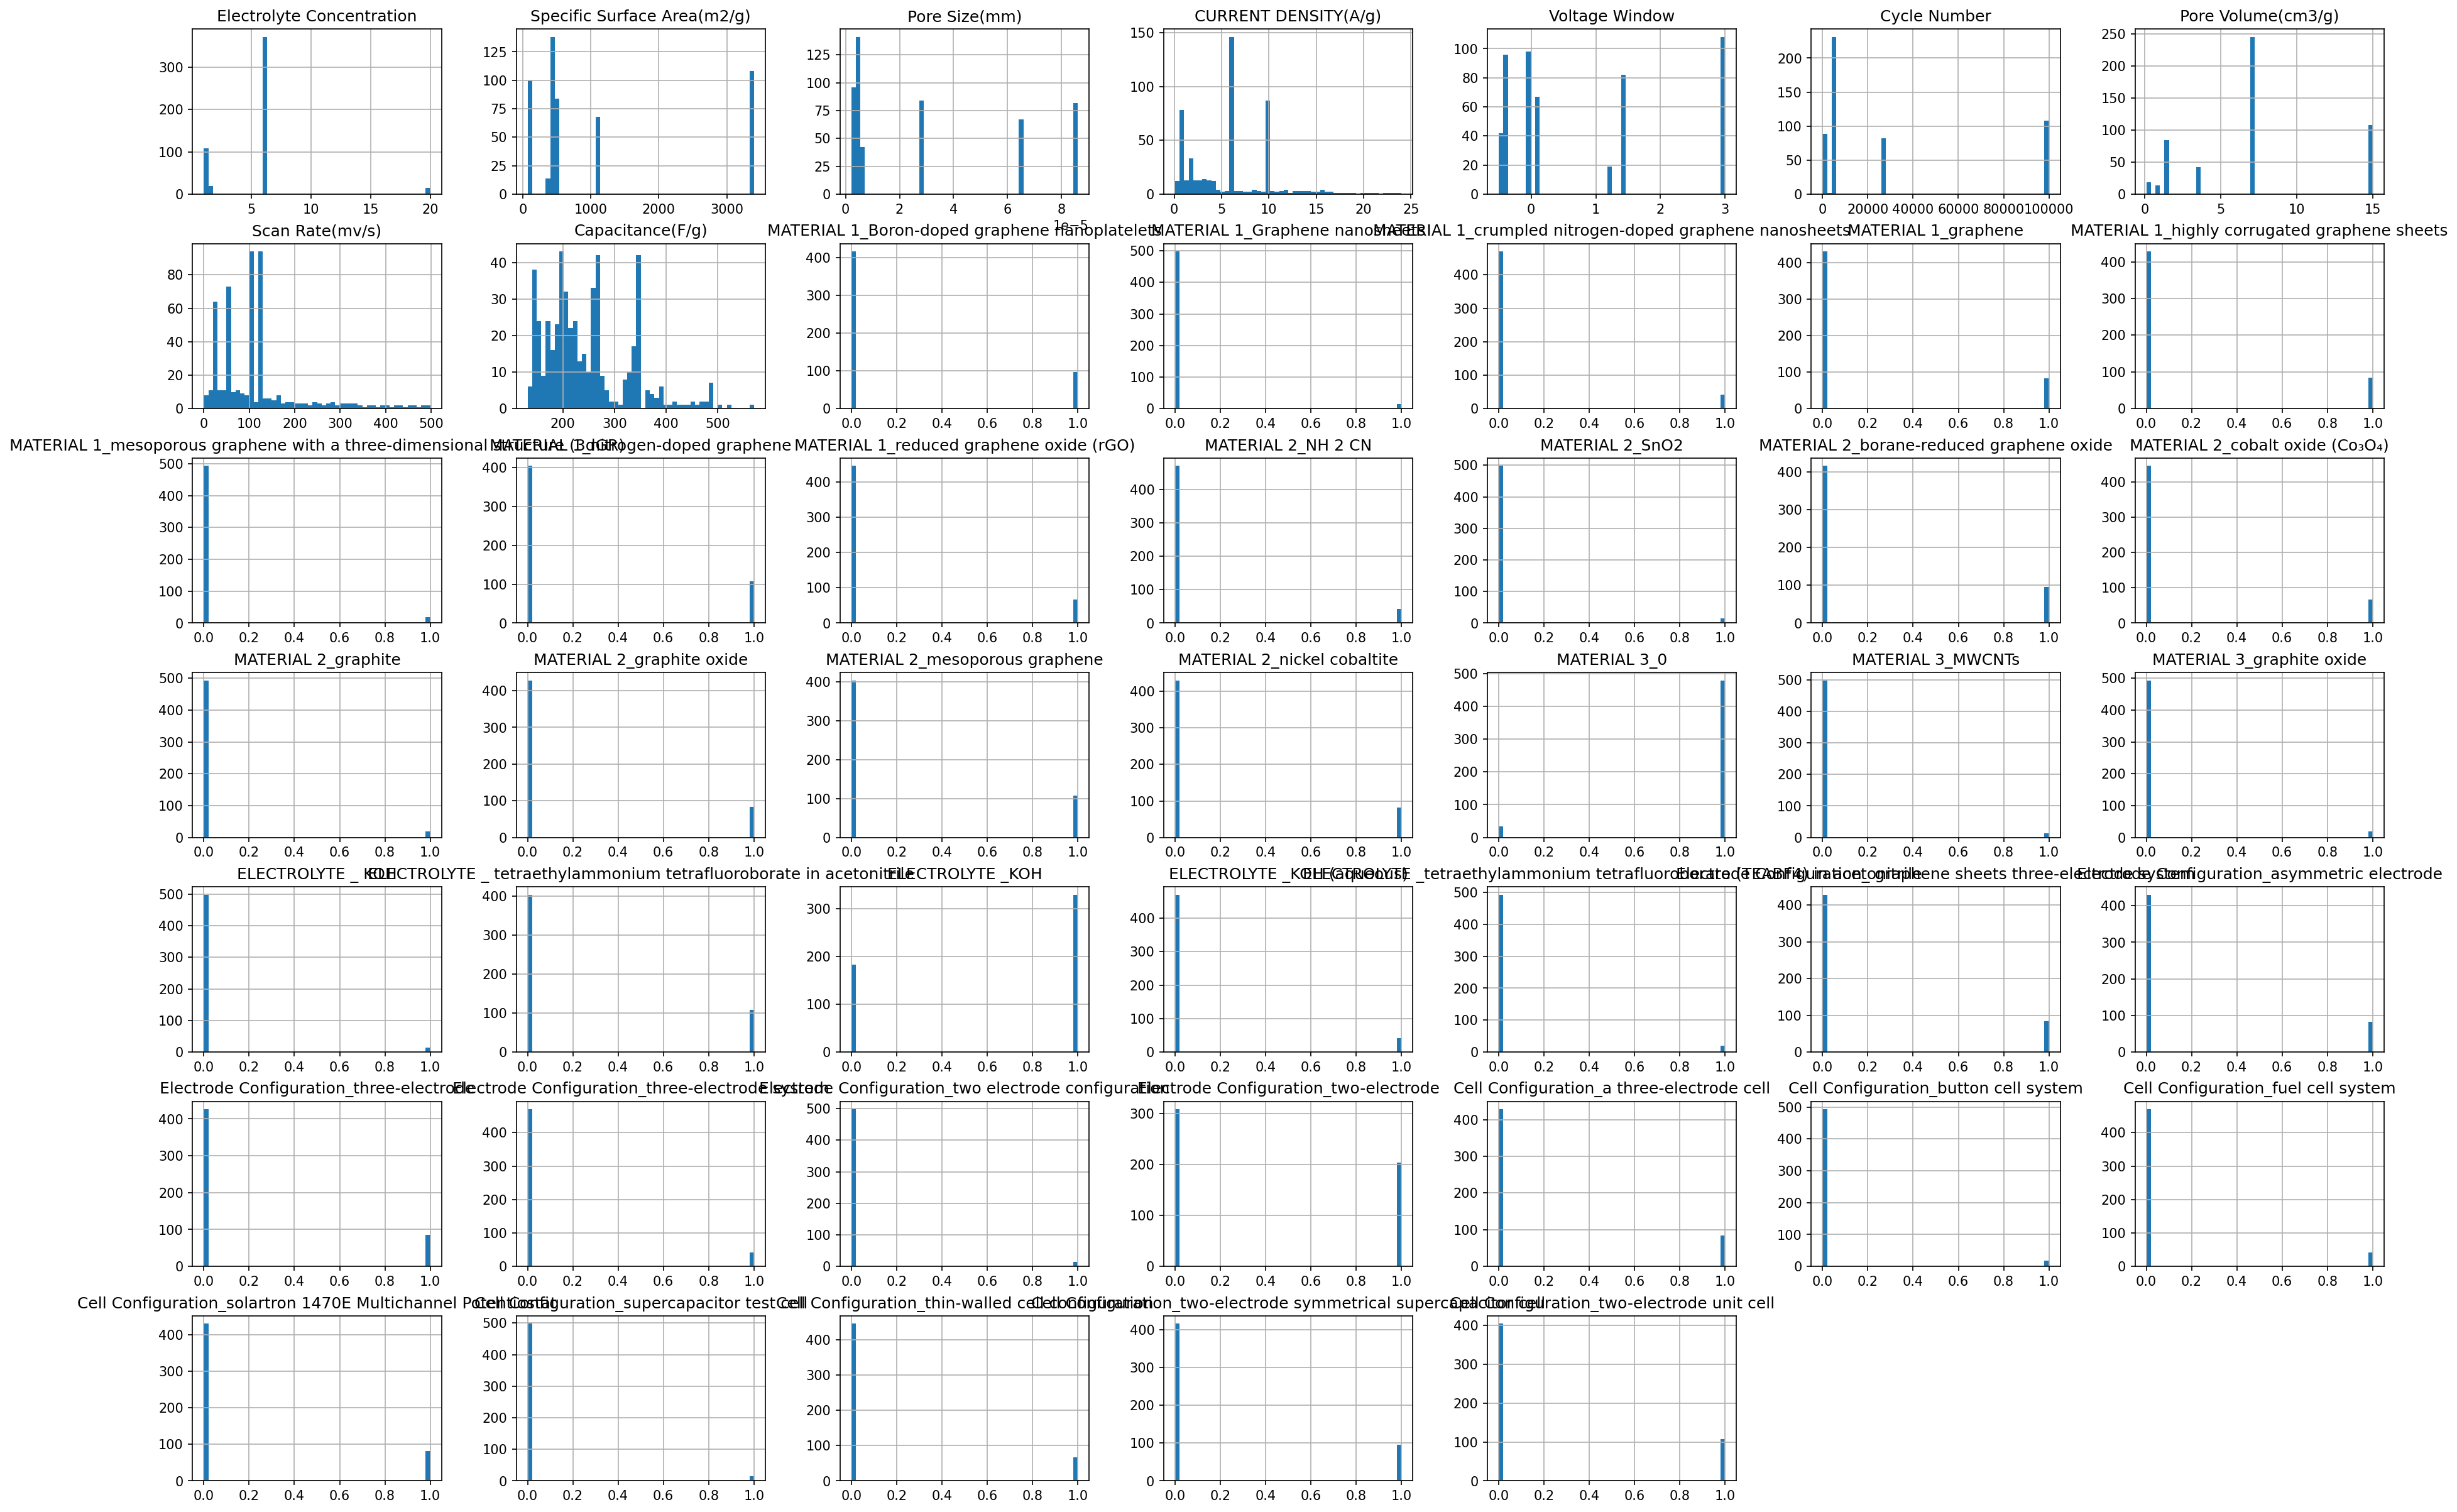

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 20), dpi=150)
df.hist(bins=50, figsize=(30, 20), ax=fig.gca())
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train.columns = X_train.columns.str.strip()
X_test.columns = X_test.columns.str.strip()
columns_to_scale = ['Electrolyte Concentration', 'Specific Surface Area(m2/g)',
       'Pore Size(mm)', 'CURRENT DENSITY(A/g)', 'Voltage Window',
       'Cycle Number', 'Pore Volume(cm3/g)', 'Scan Rate(mv/s)']
sc = StandardScaler()
X_train[columns_to_scale] = sc.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = sc.transform(X_test[columns_to_scale])

X_train.head()



,Electrolyte Concentration,Specific Surface Area(m2/g),Pore Size(mm),CURRENT DENSITY(A/g),Voltage Window,Cycle Number,Pore Volume(cm3/g),Scan Rate(mv/s),MATERIAL 1_Boron-doped graphene nanoplatelets,MATERIAL 1_Graphene nanosheets,...,Electrode Configuration_two electrode configuration,Electrode Configuration_two-electrode,Cell Configuration_a three-electrode cell,Cell Configuration_button cell system,Cell Configuration_fuel cell system,Cell Configuration_solartron 1470E Multichannel Potentiostat,Cell Configuration_supercapacitor test cell,Cell Configuration_thin-walled cell configuration,Cell Configuration_two-electrode symmetrical supercapacitor cell,Cell Configuration_two-electrode unit cell
158,0.220187,-0.853480,1.819481,3.576318,0.475444,0.007182,0.008809,-0.176916,0,0,...,0,0,0,0,0,1,0,0,0,0
342,0.220187,-0.530657,-0.836915,-0.334323,-0.906539,-0.596836,0.008809,-0.960182,1,0,...,0,1,0,0,0,0,0,0,1,0
178,0.220187,-0.488240,-0.033376,0.937374,-0.637820,-0.583886,-1.175463,-0.274824,0,0,...,0,0,1,0,0,0,0,0,0,0
371,0.220187,-0.531474,-0.704839,0.020569,-0.983316,-0.583886,-0.763996,1.115473,0,0,...,0,0,0,0,1,0,0,0,0,0
61,0.220187,-0.014762,1.154352,-1.110082,-0.541849,-0.695205,0.008809,0.055127,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:

X_test

,Electrolyte Concentration,Specific Surface Area(m2/g),Pore Size(mm),CURRENT DENSITY(A/g),Voltage Window,Cycle Number,Pore Volume(cm3/g),Scan Rate(mv/s),MATERIAL 1_Boron-doped graphene nanoplatelets,MATERIAL 1_Graphene nanosheets,...,Electrode Configuration_two electrode configuration,Electrode Configuration_two-electrode,Cell Configuration_a three-electrode cell,Cell Configuration_button cell system,Cell Configuration_fuel cell system,Cell Configuration_solartron 1470E Multichannel Potentiostat,Cell Configuration_supercapacitor test cell,Cell Configuration_thin-walled cell configuration,Cell Configuration_two-electrode symmetrical supercapacitor cell,Cell Configuration_two-electrode unit cell
432,-1.207014,1.867222,-0.761850,-0.700590,1.703874,1.876630,1.654676,-0.666457,0,0,...,0,1,0,0,0,0,0,0,0,1
433,-1.207014,1.867222,-0.761850,-0.541344,1.703874,1.876630,1.654676,-0.666457,0,0,...,0,1,0,0,0,0,0,0,0,1
352,0.220187,-0.531474,-0.704839,0.020569,-0.983316,-0.583886,-0.763996,-0.372732,0,0,...,0,0,0,0,1,0,0,0,0,0
314,0.220187,-0.530657,-0.836915,-0.907611,-0.906539,-0.596836,0.008809,-0.960182,1,0,...,0,1,0,0,0,0,0,0,1,0
156,0.220187,-0.853480,1.819481,3.303323,0.475444,0.007182,0.008809,-0.176916,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,0.220187,-0.488240,-0.033376,0.937374,-0.637820,-0.583886,-1.175463,1.428780,0,0,...,0,0,1,0,0,0,0,0,0,0
421,-1.207014,1.867222,-0.761850,0.020569,1.703874,1.876630,1.654676,-0.666457,0,0,...,0,1,0,0,0,0,0,0,0,1
91,0.220187,-0.853480,1.819481,0.027394,0.475444,0.007182,0.008809,-0.725202,0,0,...,0,0,0,0,0,1,0,0,0,0
323,0.220187,-0.530657,-0.836915,-0.723340,-0.906539,-0.596836,0.008809,-0.960182,1,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import matplotlib.pyplot as plt


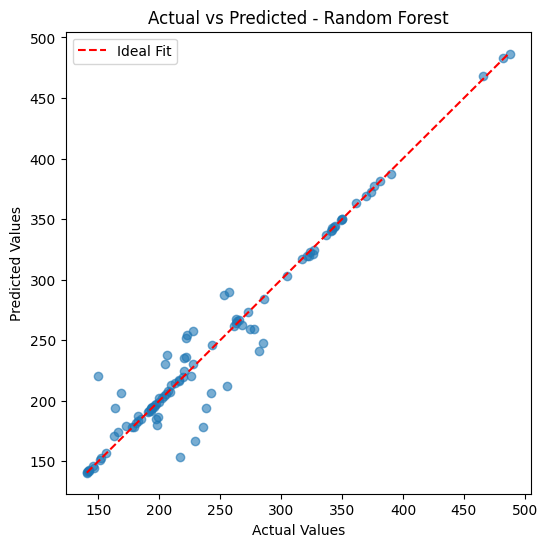

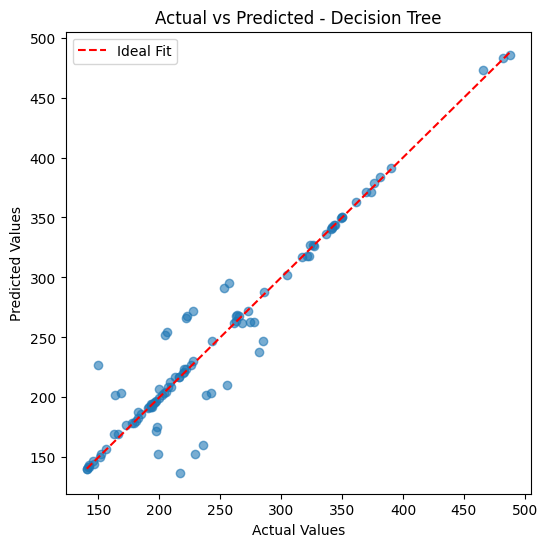

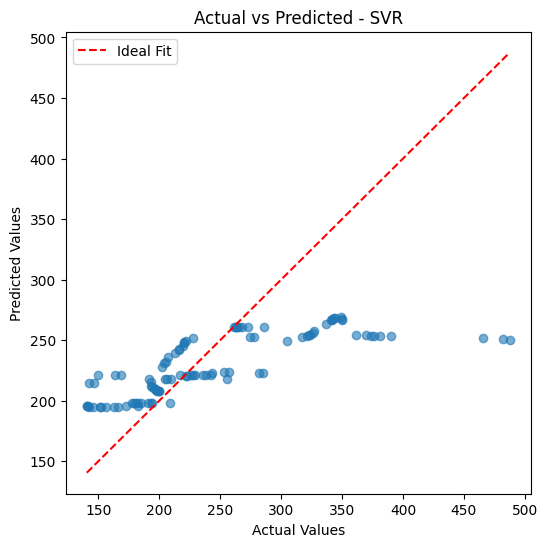

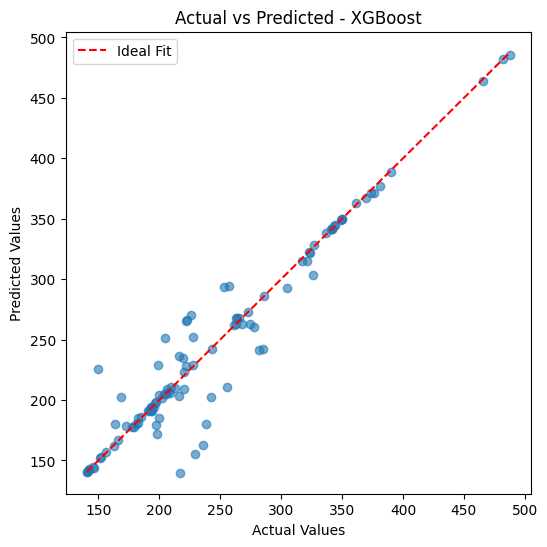

Model Evaluation Results:
           Model       RMSE        R2        MAE       EVS
0  Random Forest  18.601257  0.942966   9.328489  0.943013
1  Decision Tree  22.569386  0.916038  11.137282  0.916056
2            SVR  62.334954  0.359515  43.116355  0.397486
3        XGBoost  22.170356  0.918980  11.503705  0.919253


In [ ]:
# Define a function to evaluate models
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    ema = mean_absolute_error(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    return rmse, r2, ema, evs

# Function to create scatter plots
def scatter_plot(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Ideal Fit')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Prepare results dataframe
results = pd.DataFrame(columns=['Model', 'RMSE', 'R2', 'MAE', 'EVS'])

# Models and their initialization
models = {
    'Random Forest': RandomForestRegressor(random_state=SEED),
    'Decision Tree': DecisionTreeRegressor(random_state=SEED),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(random_state=SEED)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on the test set
    Y_pred = model.predict(X_test)

    # Evaluate the model
    rmse, r2, ema, evs = evaluate_model(Y_test, Y_pred)
    # Append results as a new row using pd.concat
    new_row = pd.DataFrame([{'Model': model_name, 'RMSE': rmse, 'R2': r2, 'MAE': ema, 'EVS': evs}])
    results = pd.concat([results, new_row], ignore_index=True)


    # Scatter plot
    scatter_plot(Y_test, Y_pred, model_name)

# Display results
print("Model Evaluation Results:")
print(results)


In [ ]:
features = list(X_train.columns)

In [ ]:
features

['Electrolyte Concentration',
 'Specific Surface Area(m2/g)',
 'Pore Size(mm)',
 'CURRENT DENSITY(A/g)',
 'Voltage Window',
 'Cycle Number',
 'Pore Volume(cm3/g)',
 'Scan Rate(mv/s)',
 'MATERIAL 1_Boron-doped graphene nanoplatelets',
 'MATERIAL 1_Graphene nanosheets',
 'MATERIAL 1_crumpled nitrogen-doped graphene nanosheets',
 'MATERIAL 1_graphene',
 'MATERIAL 1_highly corrugated graphene sheets',
 'MATERIAL 1_mesoporous graphene with a three-dimensional structure (3dGR)',
 'MATERIAL 1_nitrogen-doped graphene',
 'MATERIAL 1_reduced graphene oxide (rGO)',
 'MATERIAL 2_NH 2 CN',
 'MATERIAL 2_SnO2',
 'MATERIAL 2_borane-reduced graphene oxide',
 'MATERIAL 2_cobalt oxide (Co₃O₄)',
 'MATERIAL 2_graphite',
 'MATERIAL 2_graphite oxide',
 'MATERIAL 2_mesoporous graphene',
 'MATERIAL 2_nickel cobaltite',
 'MATERIAL 3_0',
 'MATERIAL 3_MWCNTs',
 'MATERIAL 3_graphite oxide',
 'ELECTROLYTE _ KOH',
 'ELECTROLYTE _ tetraethylammonium tetrafluoroborate in acetonitrile',
 'ELECTROLYTE _KOH',
 'ELECTROLY

In [ ]:
RFR = RandomForestRegressor(random_state=SEED)

In [ ]:
RFR.fit(X_train, Y_train)

RandomForestRegressor(random_state=23)

In [ ]:
importance = RFR.feature_importances_
importance

array([1.57138805e-03, 3.78723815e-03, 5.53415949e-01, 1.18308335e-01,
       1.00931766e-02, 2.72772074e-02, 5.64499033e-03, 2.26397814e-01,
       2.34330938e-04, 2.31142644e-04, 6.42387813e-05, 7.56368838e-03,
       7.37192313e-03, 6.12078382e-05, 1.33239904e-03, 8.97486380e-04,
       3.35904866e-05, 2.80152865e-04, 1.39267462e-04, 7.58251400e-04,
       6.06640662e-05, 2.47731290e-03, 1.00236398e-03, 6.53146453e-03,
       1.18775260e-04, 2.05633317e-04, 1.71151989e-04, 3.23124888e-04,
       7.64469342e-04, 1.64935935e-04, 5.27953948e-05, 2.23540724e-04,
       4.32862859e-03, 4.06715896e-03, 8.79830906e-04, 7.67581192e-05,
       1.82477600e-04, 2.28376228e-04, 2.68191549e-03, 1.83905706e-04,
       7.93468365e-05, 7.43866037e-03, 2.63248705e-04, 6.48433659e-04,
       1.07388753e-04, 1.27385996e-03])

In [ ]:
FIM = pd.DataFrame({'features' : features, 'feature_importances' : importance})
FIM

,features,feature_importances
0,Electrolyte Concentration,0.001571
1,Specific Surface Area(m2/g),0.003787
2,Pore Size(mm),0.553416
3,CURRENT DENSITY(A/g),0.118308
4,Voltage Window,0.010093
5,Cycle Number,0.027277
6,Pore Volume(cm3/g),0.005645
7,Scan Rate(mv/s),0.226398
8,MATERIAL 1_Boron-doped graphene nanoplatelets,0.000234
9,MATERIAL 1_Graphene nanosheets,0.000231


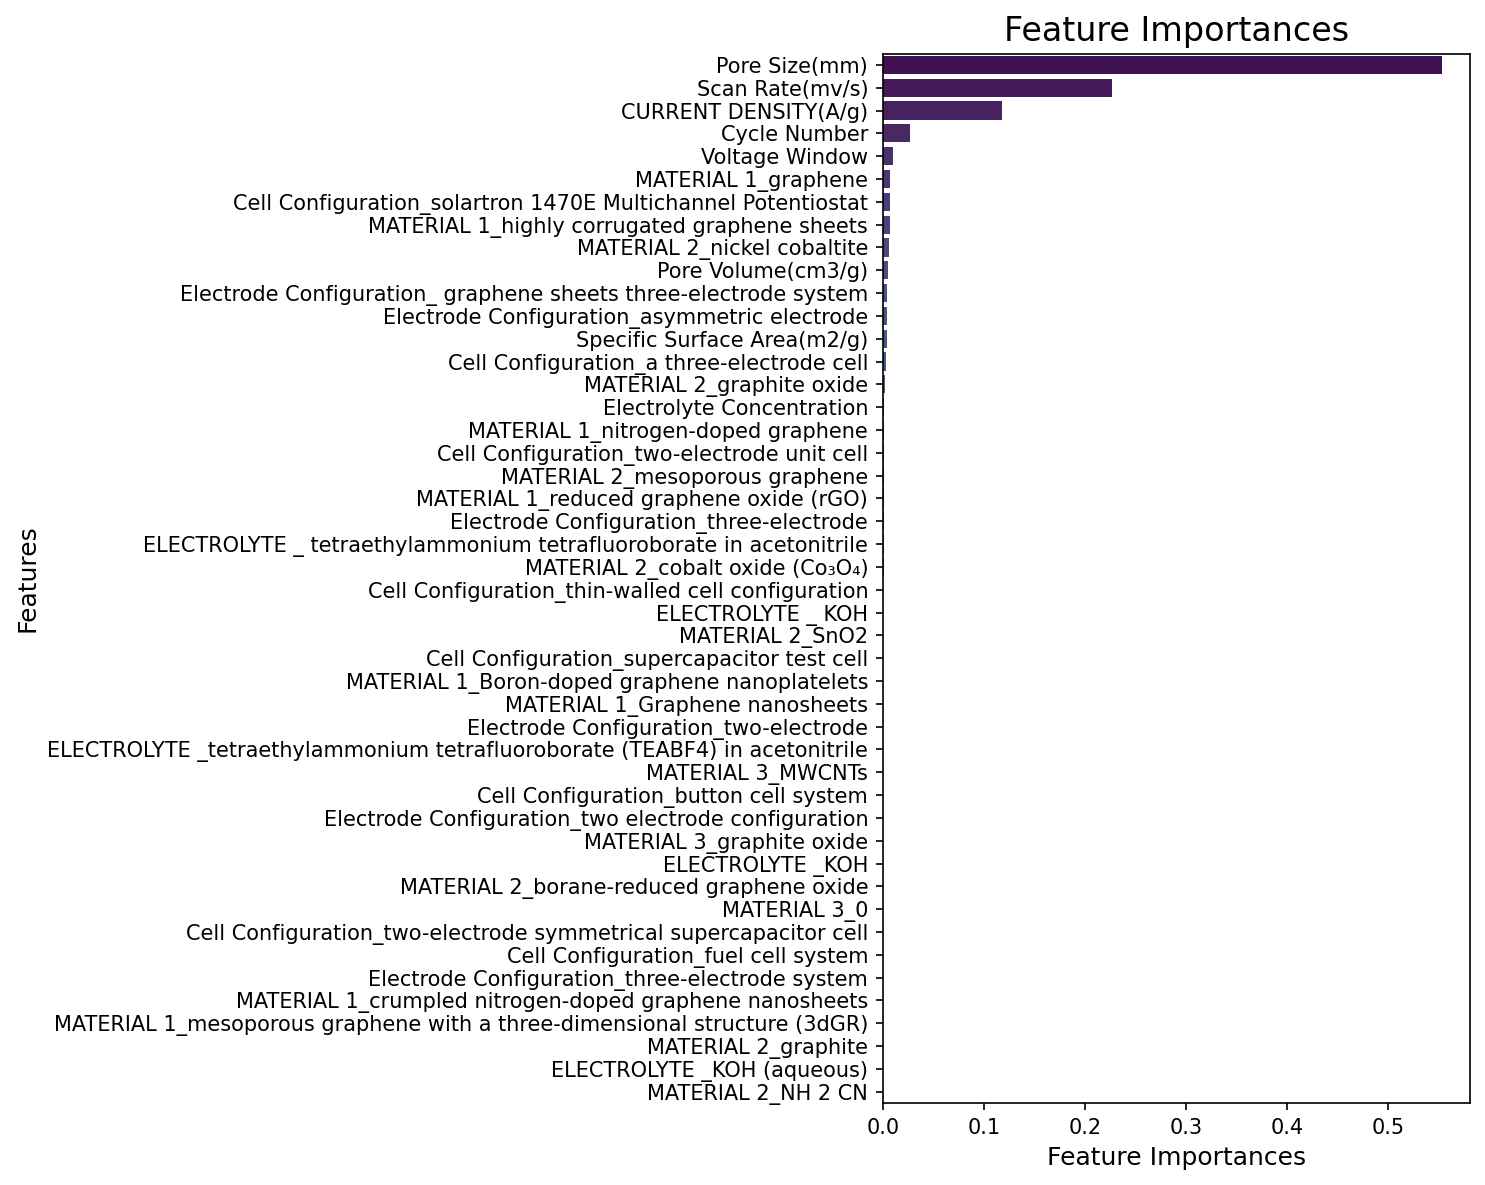

In [ ]:

plt.figure(figsize=(10, 8), dpi=150)

# Sort feature importances for better visualization
FIM = FIM.sort_values(by="feature_importances", ascending=False)

# Create a barplot with improved label handling
sns.barplot(y='features', x='feature_importances', data=FIM, palette="viridis")

# Add titles and labels for better readability
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Feature Importances', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust spacing if labels are still cluttered
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
!pip install shap

In [ ]:
df.columns

Index(['Electrolyte Concentration', 'Specific Surface Area(m2/g)',
       'Pore Size(mm)', 'CURRENT DENSITY(A/g)', 'Voltage Window',
       'Cycle Number', 'Pore Volume(cm3/g)', 'Scan Rate(mv/s)',
       'Capacitance(F/g)', 'MATERIAL 1_Boron-doped graphene nanoplatelets',
       'MATERIAL 1_Graphene nanosheets',
       'MATERIAL 1_crumpled nitrogen-doped graphene nanosheets',
       'MATERIAL 1_graphene', 'MATERIAL 1_highly corrugated graphene sheets',
       'MATERIAL 1_mesoporous graphene with a three-dimensional structure (3dGR)',
       'MATERIAL 1_nitrogen-doped graphene',
       'MATERIAL 1_reduced graphene oxide (rGO)', 'MATERIAL 2_NH 2 CN',
       'MATERIAL 2_SnO2', 'MATERIAL 2_borane-reduced graphene oxide',
       'MATERIAL 2_cobalt oxide (Co₃O₄)', 'MATERIAL 2_graphite',
       'MATERIAL 2_graphite oxide', 'MATERIAL 2_mesoporous graphene',
       'MATERIAL 2_nickel cobaltite', 'MATERIAL 3_0', 'MATERIAL 3_MWCNTs',
       'MATERIAL 3_graphite oxide', 'ELECTROLYTE _ KOH',
      

In [ ]:
import shap
X = df.drop(['Capacitance(F/g)'],axis = 1)
explainer = shap.TreeExplainer(model,feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X)

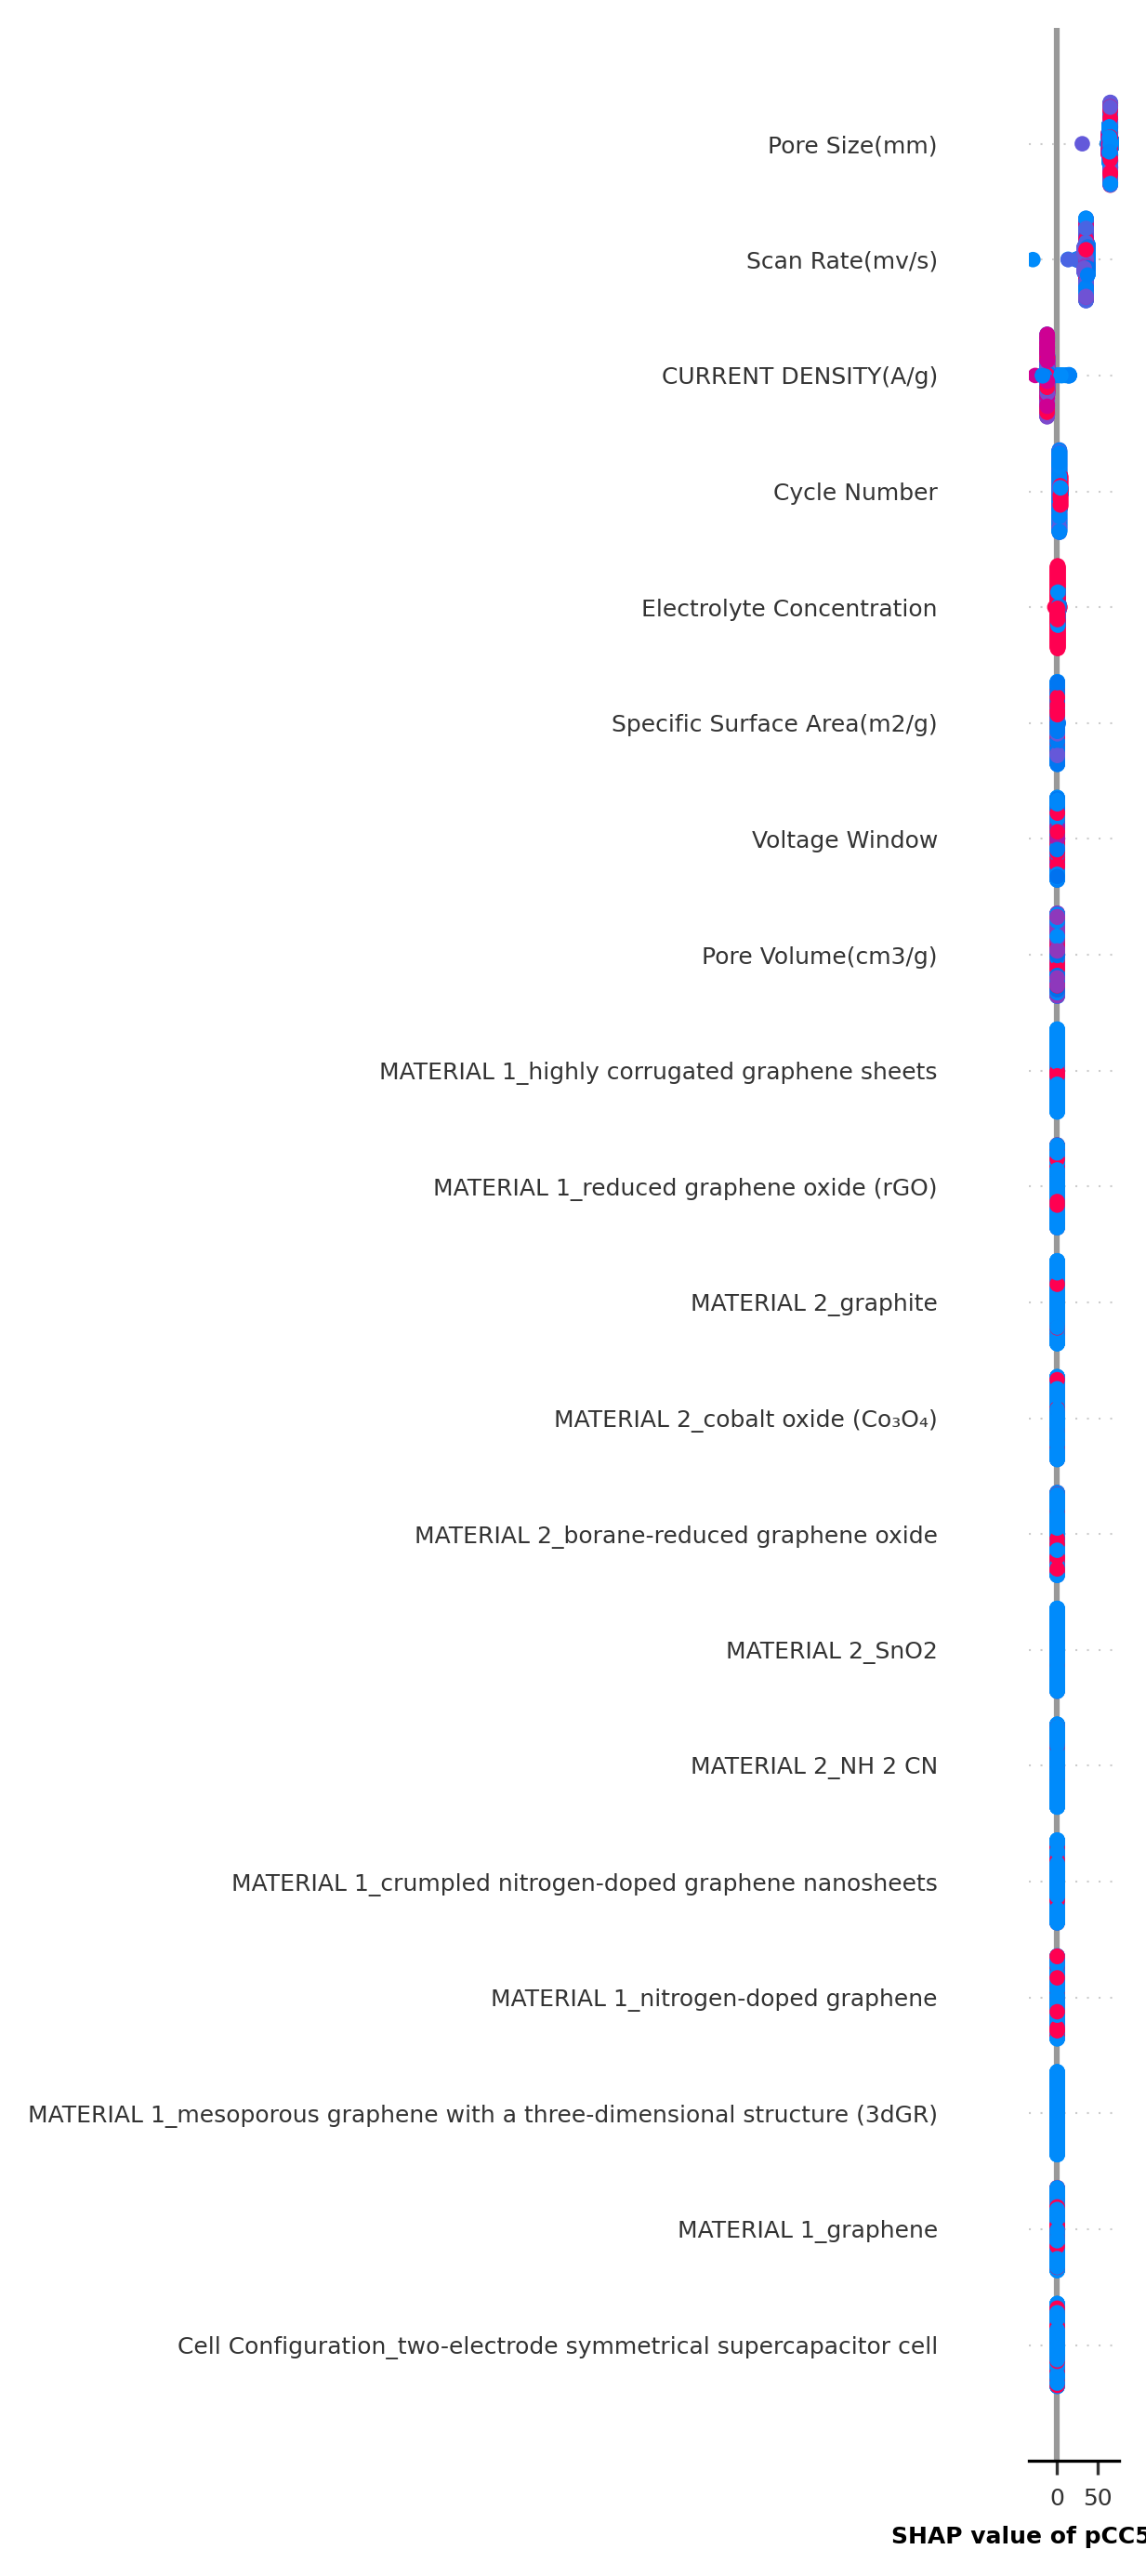

In [ ]:
plt.figure(dpi=300)
shap.summary_plot(shap_values, X,show=False,color_bar=False)
plt.xlabel("SHAP value of pCC50 model" ,fontweight='bold',fontsize=6)
plt.tick_params(labelsize=6,)
plt.show()